In [2]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import os # need for file enumeration
import random
from sklearn.model_selection import train_test_split


# CNN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,LeakyReLU

# pre-trained
from tensorflow.keras.applications import VGG19,EfficientNetB4


import gc

# reloads module to update
import universal_methods
import importlib
importlib.reload(universal_methods)
# .py file with universal methods, that I use more than one time in this project
from universal_methods import Universal

# For reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Acquisition

In [9]:
X,y,class_labels=Universal().get_images()
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

General class proportions

<Figure size 432x288 with 0 Axes>

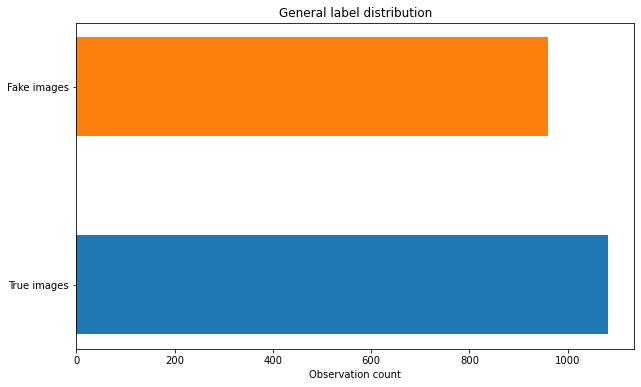

In [3]:
Universal().plot_proportions(y,"General label distribution")

Dataset contains two balanced classes. With almost equal amount of fakes and real images.

# !!!!!
- Simple model
-- Review, features, gradient, plan of model
- Pretrained model
-- Review, features, gradient, plan of model
- Pretrained model 2
-- Review, features, gradient, plan of model
- Simple model on easy dataset
-- Review, features, gradient, plan of model
- Simple model categorical
-- Review, features, gradient, plan of model
- Pretrained model categorical
-- Review, features, gradient, plan of model


Train-val-test split and shapes check. Did X_train split twice to get validation set.

In [3]:
X_train_temp,X_test,y_train_temp,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train_temp,y_train_temp,random_state=42,stratify=y_train_temp,test_size=0.11)
X_train.shape,y_train.shape,X_val.shape,y_val.shape, X_test.shape,y_test.shape

((1634, 600, 600, 3),
 (1634,),
 (202, 600, 600, 3),
 (202,),
 (205, 600, 600, 3),
 (205,))

Plot of class proportion for X_train

<Figure size 432x288 with 0 Axes>

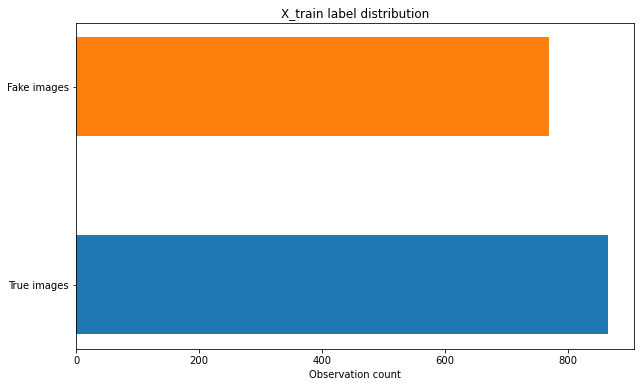

In [5]:
Universal().plot_proportions(y_train,"X_train label distribution")

Plot of class proportion for X_val

<Figure size 432x288 with 0 Axes>

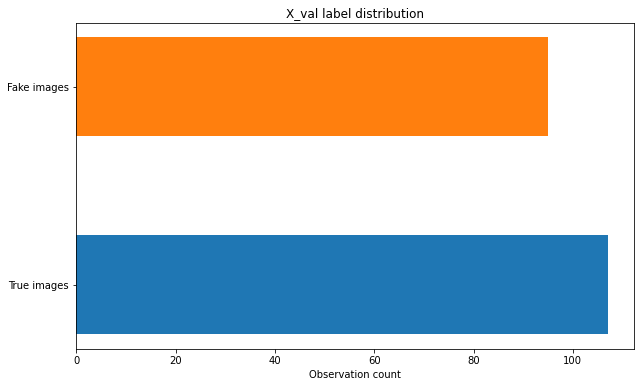

In [6]:
Universal().plot_proportions(y_val,"X_val label distribution")

Plot of class proportion for X_test

<Figure size 432x288 with 0 Axes>

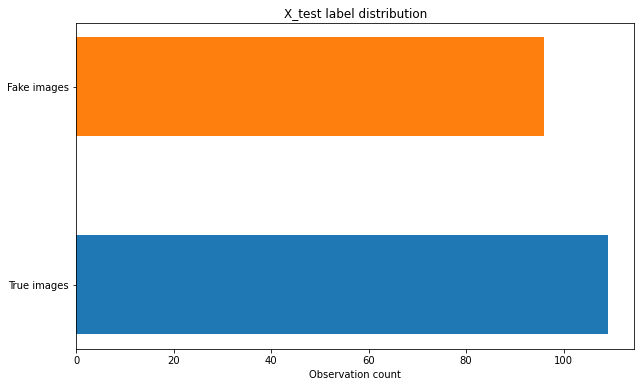

In [7]:
Universal().plot_proportions(y_test,"X_test label distribution")

Baseline accuracy

In [13]:
print (f"Baseline accuracy : {(y>0).mean(0)}")

Baseline accuracy : 0.5296423321901029


## Modeling
----
##### Simple model 
First of all let's try to run our data through simple CNN.

In [8]:
# very simple CNN
model_simple = Sequential()
model_simple.add(Conv2D(filters = 8, kernel_size = (8, 8), activation = 'relu', input_shape = (600, 600, 3)))
model_simple.add(MaxPooling2D(pool_size = (3, 3)))
model_simple.add(Conv2D(filters = 8, kernel_size = (6, 6), activation = 'relu'))
model_simple.add(MaxPooling2D(pool_size = (2, 2)))
model_simple.add(Flatten())
model_simple.add(Dense(64, activation = 'relu'))
model_simple.add(Dense(1, activation = 'sigmoid'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['acc'])
history_model_simple = model_simple.fit(
    X_train, y_train,
     batch_size = 32,
      epochs = 20,
       verbose = 1,
        validation_data = (X_val, y_val)
    )

2022-11-11 21:30:14.566822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-11 21:30:14.567482: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-11 21:30:20.340211: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-11-11 21:30:22.149563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5269

2022-11-11 21:30:42.971428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 24s 414ms/step - loss: 0.6929 - acc: 0.5269 - val_loss: 0.6958 - val_acc: 0.5297
Epoch 2/20
52/52 [==============================] - 17s 323ms/step - loss: 0.6925 - acc: 0.5294 - val_loss: 0.6959 - val_acc: 0.5297
Epoch 3/20
52/52 [==============================] - 17s 324ms/step - loss: 0.6922 - acc: 0.5294 - val_loss: 0.6962 - val_acc: 0.5297
Epoch 4/20
52/52 [==============================] - 17s 323ms/step - loss: 0.6920 - acc: 0.5294 - val_loss: 0.6964 - val_acc: 0.5297
Epoch 5/20
52/52 [==============================] - 17s 322ms/step - loss: 0.6919 - acc: 0.5294 - val_loss: 0.6966 - val_acc: 0.5297
Epoch 6/20
52/52 [==============================] - 17s 321ms/step - loss: 0.6917 - acc: 0.5294 - val_loss: 0.6969 - val_acc: 0.5297
Epoch 7/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6916 - acc: 0.5294 - val_loss: 0.6971 - val_acc: 0.5297
Epoch 8/20
52/52 [==============================] - 17s 322ms/step - loss: 0.691

And generate summary plot.

2022-11-11 21:36:05.297788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 177ms/step


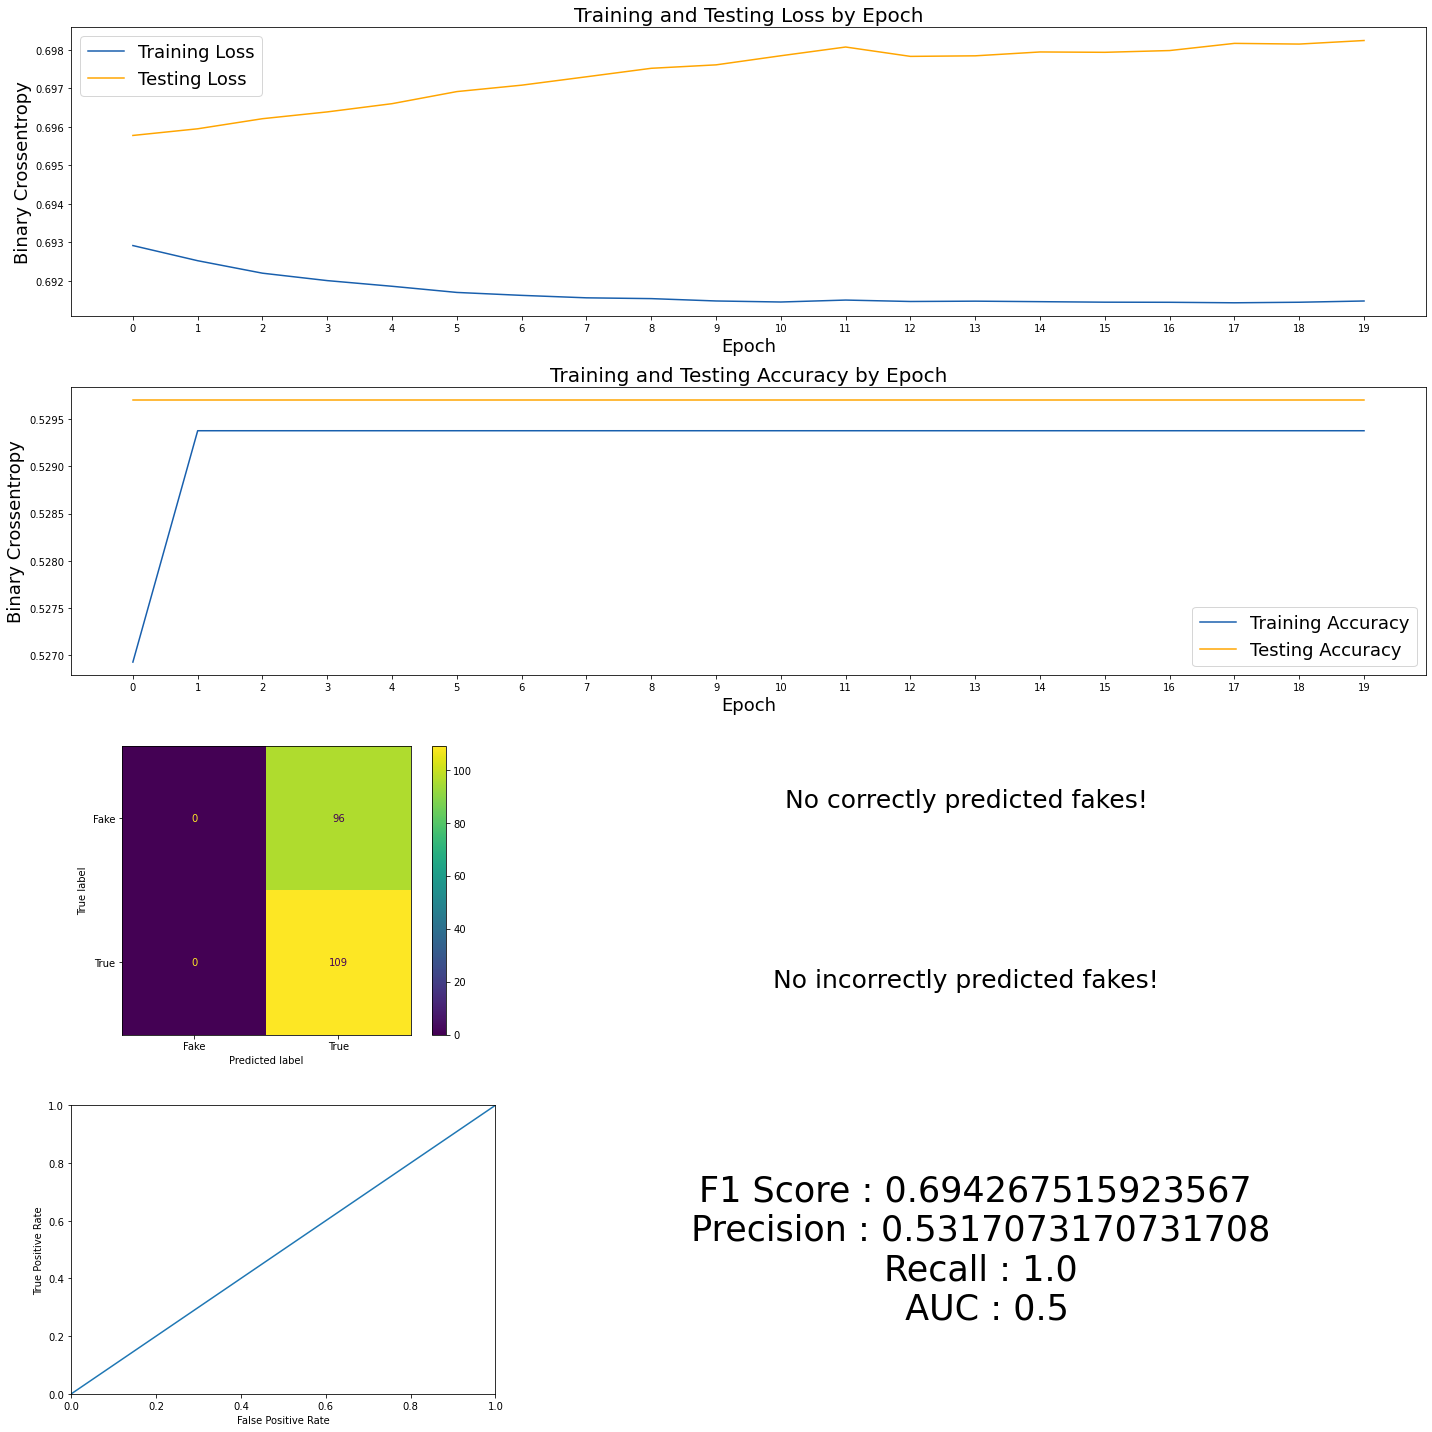

In [9]:
# Method I've developed to visualize all crucial modeling results on one plot. 
matches,mismatches,plot=Universal().plot_results_duo(history_model_simple,model_simple,X_test,y_test,"model_simple");

Confusion matrix shows that model cannot effectively catch the signal to correctly recognize and predict fakes. 
Test X_test set totally contains 205 images, and model predicted that all of them are true/real images.   

ROC-AUC plot shows that true and false image sets are not just overlapping - for the model they are basically identically and it clearly doesn't learn as it should. This can be caused either by simplicity of the model, either by images which need more manipulation/augmentation to highlight their differences. For now it is not clear, why model doesn't work as it suppose.
 To exclude model assumption, let's pass our dataset through much more powerful pre-trained model. 

Quick check of layer's output, using this image as an example.

(<matplotlib.image.AxesImage at 0x8cc6a7130>, 1.0)

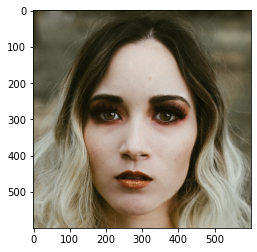

In [14]:
plt.imshow(X_test[6]),y_test[6]

First of all, let's check Grad-Cam to see which parts of the image, model used more to make a prediction. 
It's a simple model, so basically we can say it captured border between different contrast zones.


[<keras.layers.convolutional.conv2d.Conv2D object at 0x17f86a280>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2a9cdae20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x17f843e80>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2b34aaaf0>, <keras.layers.reshaping.flatten.Flatten object at 0x17f843f70>, <keras.layers.core.dense.Dense object at 0x16f917bb0>, <keras.layers.core.dense.Dense object at 0x2b34f5610>]


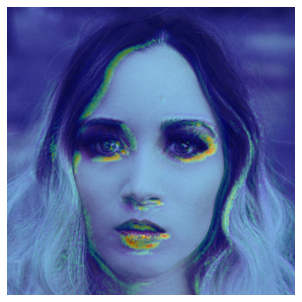

In [12]:
Universal().get_conv(model_simple,X_test[6],"model_simple_grad",alpha=0.4);

Next, I'll plot stages of image transformation  from layer to layer inside the model. We probably won't get much use out of this and this is one of the reasons, why neural networks are considered as "black boxed". But it is really good for basic understanding of how exactly convolutional layers work.

1/1 [==============================] - 0s 32ms/step


2022-11-11 21:53:15.929192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

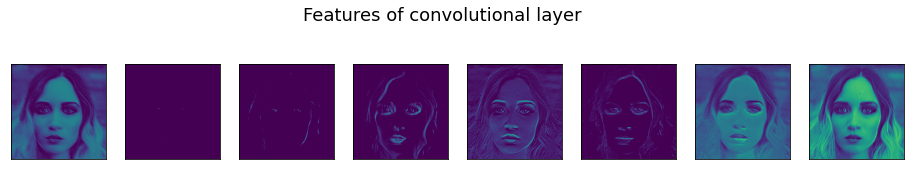

In [16]:
Universal().get_feat(model_simple,X_test[6],layer_num=0,savename="model_simple_features_conv_0");

1/1 [==============================] - 0s 44ms/step


2022-11-11 21:53:17.993749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

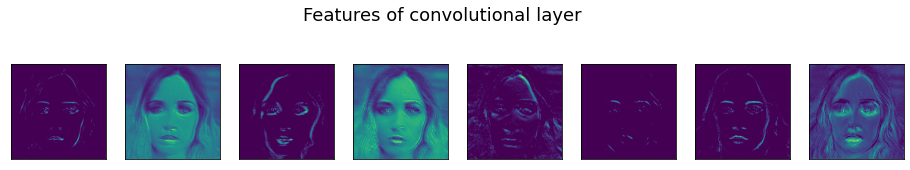

In [17]:
Universal().get_feat(model_simple,X_test[6],layer_num=2,savename="model_simple_features_conv_2");

These plots show how model's convolution layer sees images and what actual part of images are used for training

---
Filters

This is filter set for the first Conv layer. Each column represent filters for each color channel.
The dark squares indicate small weights, light squares represent large weights. Filters are in the size 8x8 pix, whicch is our kernel size on the Conv layer.

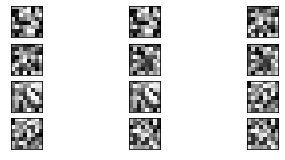

In [19]:
Universal().get_filters(model_simple,0,savename="model_simple_filters_conv_0")

Cleaning

In [20]:
# free-up memory
del model_simple
gc.collect()
tf.keras.backend.clear_session()

----

##### Pre-trained model

Now let's try our dataset on a much more complicated model with prelearned weights.

In [7]:
pretrained_vgg = VGG19(input_shape=[600,600,3], include_top=False,weights="imagenet")
pretrained_vgg.trainable = False;

In [9]:
model_vgg=Sequential()
model_vgg.add(pretrained_vgg)
model_vgg.add(Flatten())

model_vgg.add(Dense(128,activation="relu"))
model_vgg.add(Dense(64,activation="relu"))
model_vgg.add(Dense(1,activation="sigmoid"))
model_vgg.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_vgg=model_vgg.fit(X_train,y_train,batch_size=16,validation_data=(X_val,y_val),epochs=10,verbose=1)


Epoch 1/10


2022-11-11 22:25:22.070714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 1.2778 - acc: 0.5135

2022-11-11 22:27:27.602941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 142s 1s/step - loss: 1.2778 - acc: 0.5135 - val_loss: 0.7358 - val_acc: 0.4703
Epoch 2/10
103/103 [==============================] - 137s 1s/step - loss: 0.7558 - acc: 0.5024 - val_loss: 0.6953 - val_acc: 0.4604
Epoch 3/10
103/103 [==============================] - 137s 1s/step - loss: 0.7513 - acc: 0.5196 - val_loss: 0.6924 - val_acc: 0.5297
Epoch 4/10
103/103 [==============================] - 139s 1s/step - loss: 0.7400 - acc: 0.4988 - val_loss: 0.7743 - val_acc: 0.5297
Epoch 5/10
103/103 [==============================] - 138s 1s/step - loss: 0.7251 - acc: 0.5122 - val_loss: 0.6922 - val_acc: 0.5297
Epoch 6/10
103/103 [==============================] - 138s 1s/step - loss: 0.7169 - acc: 0.5086 - val_loss: 0.7475 - val_acc: 0.5297
Epoch 7/10
103/103 [==============================] - 138s 1s/step - loss: 0.7027 - acc: 0.5098 - val_loss: 0.7389 - val_acc: 0.5297
Epoch 8/10
103/103 [==============================] - 138s 1s/step - loss: 0.702

Generating summary

2022-11-11 22:48:33.164697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 17s 3s/step


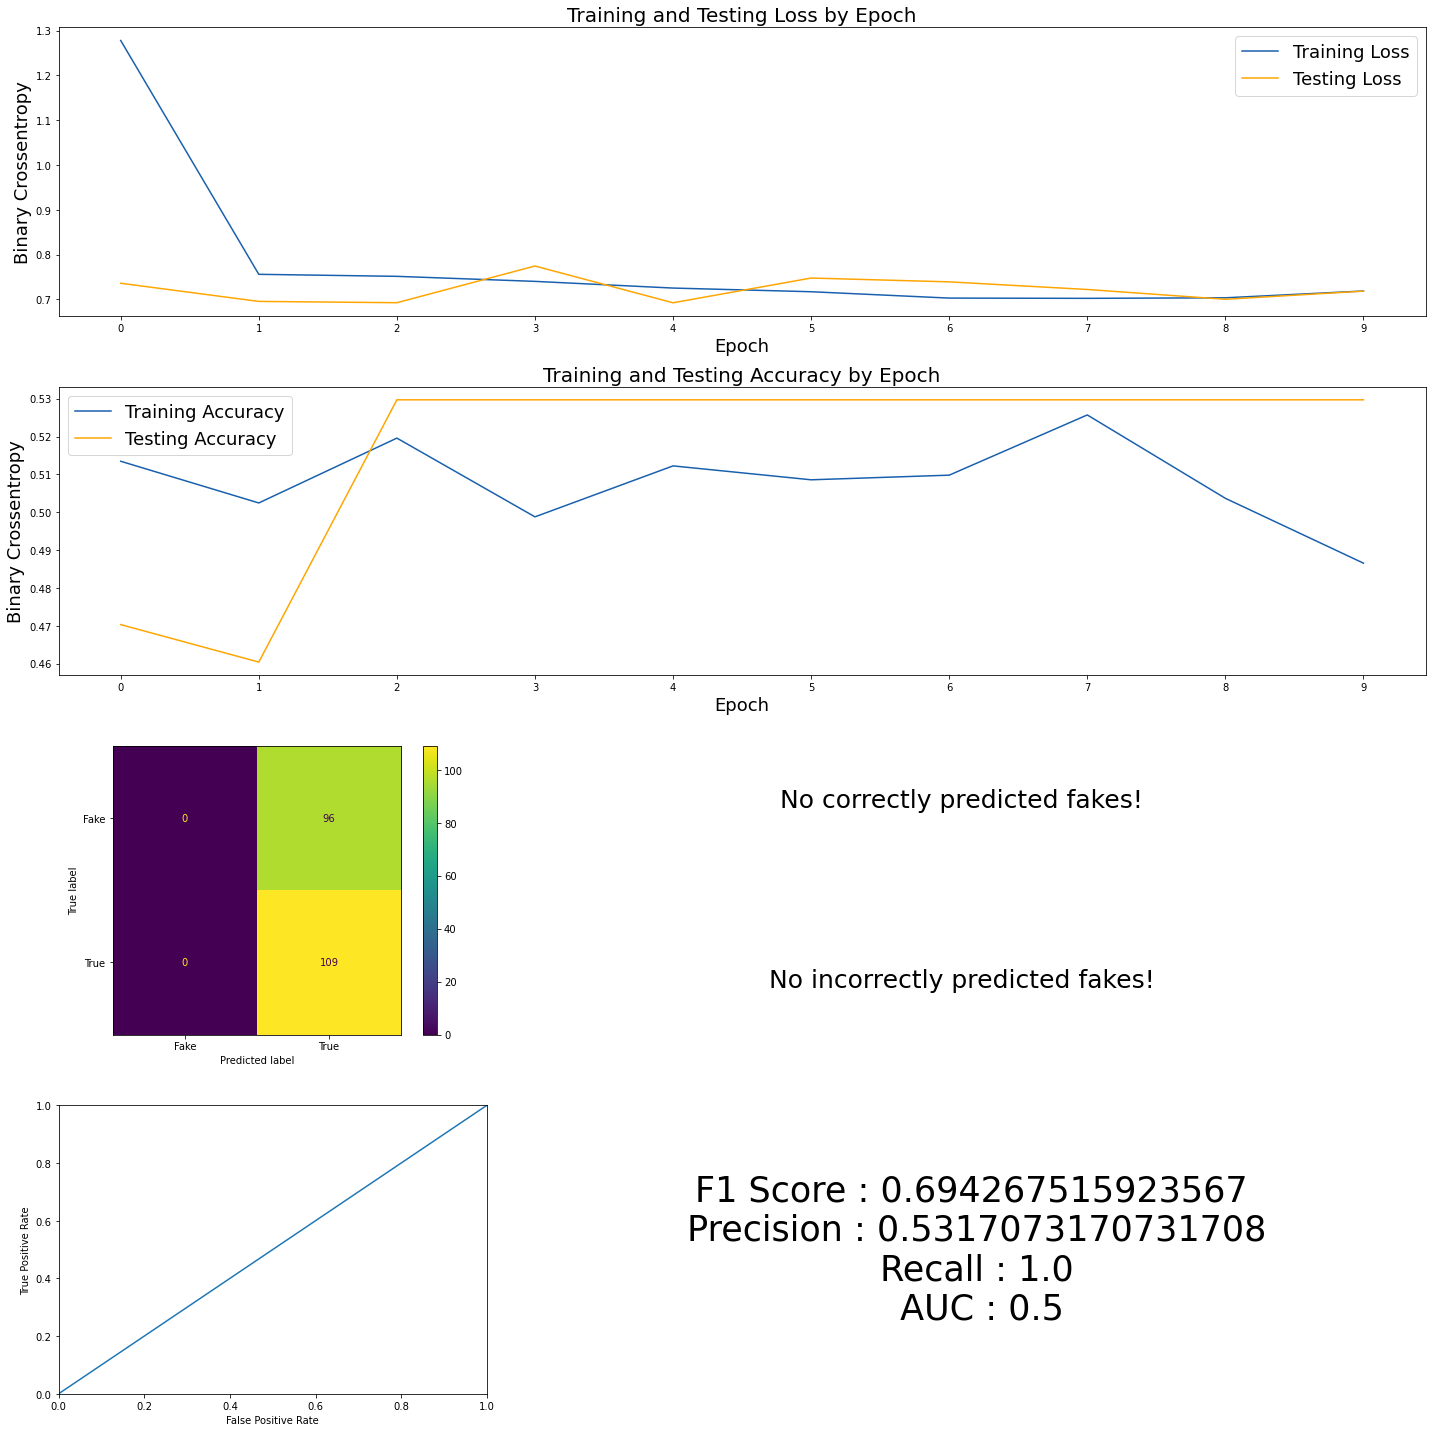

In [10]:
matches_2,mismatches_2, plot=Universal().plot_results_duo(history_vgg,model_vgg,X_test,y_test,"VGG");

Summary shows, that results of modeling are identical to the simple model. VGG is not able to catch the signal and recognize difference between two classes.

Cleaning

In [ ]:
# free-up memory
del model_vgg
gc.collect()
tf.keras.backend.clear_session()

----
##### Pretrained model 2

As second pre-trained model, I'll use EfficientNetB4, it was used by a lot of Kaggle and Facebook competition winners. It has input size 380x380 so I'll re-generate dataset in that size, using parameter.

In [11]:
X_380,y_380,class_labels=Universal().get_images(size=380)
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

Creating new X_train, X_val, X_test sets at 380x380 size.

In [12]:
X_train_temp_380,X_test_380,y_train_temp_380,y_test_380=train_test_split(X_380,y_380,random_state=42,stratify=y_380,test_size=0.1)
X_train_380,X_val_380,y_train_380,y_val_380=train_test_split(X_train_temp_380,y_train_temp_380,random_state=42,stratify=y_train_temp_380,test_size=0.11)
X_train_380.shape,y_train_380.shape,X_val_380.shape,y_val_380.shape, X_test_380.shape,y_test_380.shape

((1634, 380, 380, 3),
 (1634,),
 (202, 380, 380, 3),
 (202,),
 (205, 380, 380, 3),
 (205,))

Creating an instance of a EfficientNetB4 model.

In [14]:
eff_net = EfficientNetB4(include_top=False, weights='imagenet',input_shape=(380,380,3))
eff_net.trainable=False



And fitting the dataset

In [15]:
model_eff=Sequential()
model_eff.add(eff_net)
model_eff.add(Flatten())
model_eff.add(Dense(128,activation="relu"))
model_eff.add(Dense(64,activation="relu"))
model_eff.add(Dense(1,activation="sigmoid"))
model_eff.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_model_eff=model_eff.fit(X_train_380,y_train_380,batch_size=16,validation_data=(X_val_380,y_val_380),epochs=10,verbose=1)


Epoch 1/10


2022-11-11 22:51:27.821209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 5.9285 - acc: 0.5080

2022-11-11 22:52:43.078358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 95s 819ms/step - loss: 5.9285 - acc: 0.5080 - val_loss: 2.6473 - val_acc: 0.4703
Epoch 2/10
103/103 [==============================] - 74s 718ms/step - loss: 2.0299 - acc: 0.5067 - val_loss: 2.0647 - val_acc: 0.4703
Epoch 3/10
103/103 [==============================] - 74s 715ms/step - loss: 1.4997 - acc: 0.5110 - val_loss: 1.1262 - val_acc: 0.5297
Epoch 4/10
103/103 [==============================] - 76s 736ms/step - loss: 0.8828 - acc: 0.5024 - val_loss: 1.0231 - val_acc: 0.4703
Epoch 5/10
103/103 [==============================] - 77s 744ms/step - loss: 0.8122 - acc: 0.5165 - val_loss: 0.7529 - val_acc: 0.4703
Epoch 6/10
103/103 [==============================] - 74s 717ms/step - loss: 0.9613 - acc: 0.4823 - val_loss: 0.9116 - val_acc: 0.5297
Epoch 7/10
103/103 [==============================] - 74s 716ms/step - loss: 0.8924 - acc: 0.4933 - val_loss: 1.3756 - val_acc: 0.5297
Epoch 8/10
103/103 [==============================] - 74s 717ms/st

2022-11-11 23:05:15.561003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 14s 2s/step


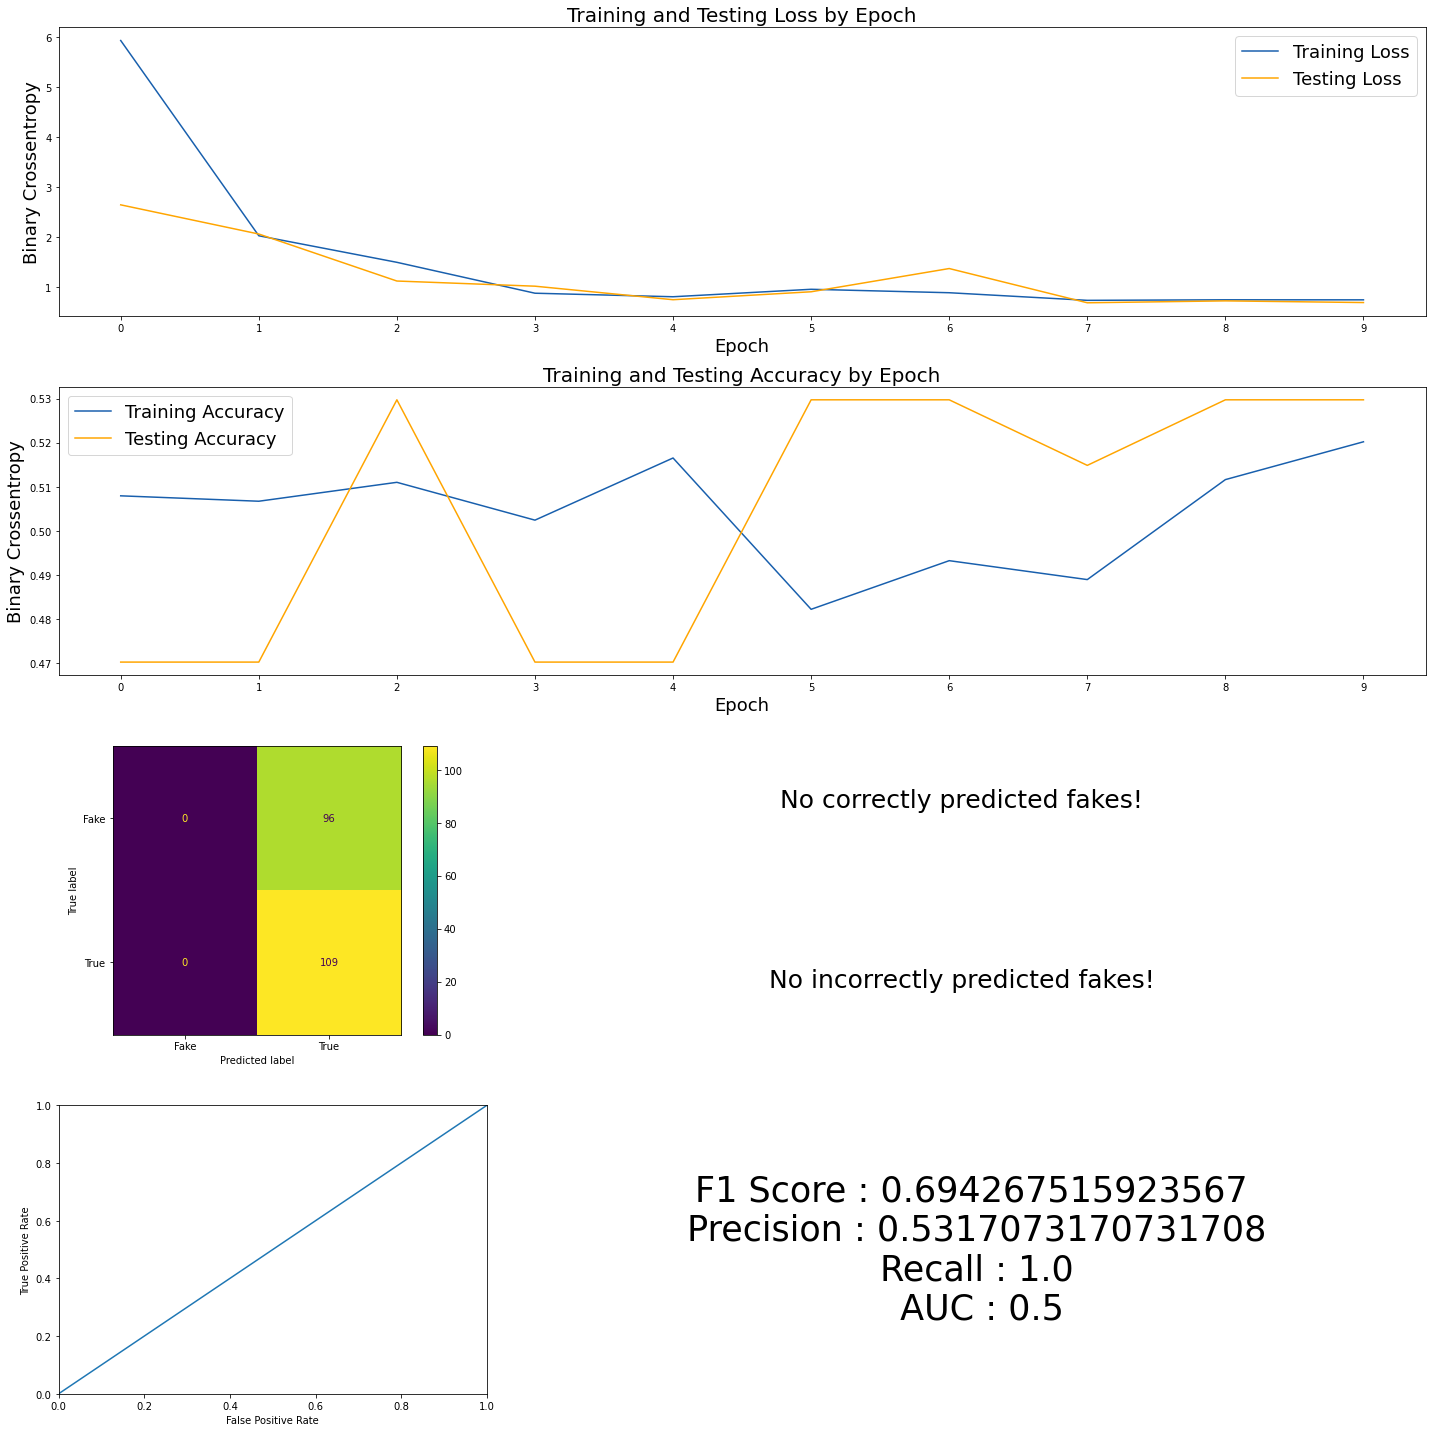

In [16]:
matches_3,mismatches_3, plot=Universal().plot_results_duo(history_model_eff,model_eff,X_test_380,y_test_380);

Still no good results, but we can see on accuracy subplot that model started learning, and model ran much faster, because of the smaller dataset size. 

Cleaning

In [ ]:
# free-up memory
del model_eff
gc.collect()
tf.keras.backend.clear_session()

----
##### Custom Model
https://github.com/nii-yamagishilab/MesoNet#

So, my next attempt will be custom model with a much smaller input images size. That will increase iteration speed and will let me to manually adjust layers.
<p> First of all, I'll generate dataset.

In [3]:
X_150,y_150,class_labels=Universal().get_images(size=150)
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

In [4]:
X_train_temp_150,X_test_150,y_train_temp_150,y_test_150=train_test_split(X_150,y_150,random_state=42,stratify=y_150,test_size=0.1)
X_train_150,X_val_150,y_train_150,y_val_150=train_test_split(X_train_temp_150,y_train_temp_150,random_state=42,stratify=y_train_temp_150,test_size=0.11)
X_train_150.shape,y_train_150.shape,X_val_150.shape,y_val_150.shape, X_test_150.shape,y_test_150.shape

((1634, 150, 150, 3),
 (1634,),
 (202, 150, 150, 3),
 (202,),
 (205, 150, 150, 3),
 (205,))

In [17]:
model_custom=Sequential()
model_custom.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu',use_bias=True,input_shape = (150, 150, 3)))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_custom.add(Conv2D(8, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_custom.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_custom.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_custom.add(Flatten())
model_custom.add(Dropout(0.5))
model_custom.add(Dense(16,kernel_regularizer =tf.keras.regularizers.l2(l=0.005)))
model_custom.add(LeakyReLU(alpha=0.1))
model_custom.add(Dropout(0.5))
model_custom.add(Dense(1, activation = 'sigmoid'))
model_custom.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history_custom=model_custom.fit(X_train_150, y_train_150, batch_size = 128, epochs = 25, verbose = 1, validation_data = (X_val_150, y_val_150))


Epoch 1/25


2022-11-11 23:25:27.676232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 1.4591 - acc: 0.4798

2022-11-11 23:25:29.600097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 3s 128ms/step - loss: 1.4591 - acc: 0.4798 - val_loss: 0.8441 - val_acc: 0.4901
Epoch 2/25
13/13 [==============================] - 1s 88ms/step - loss: 0.9773 - acc: 0.5208 - val_loss: 0.8373 - val_acc: 0.5495
Epoch 3/25
13/13 [==============================] - 1s 71ms/step - loss: 0.9398 - acc: 0.5159 - val_loss: 0.8242 - val_acc: 0.5842
Epoch 4/25
13/13 [==============================] - 1s 71ms/step - loss: 0.9125 - acc: 0.5220 - val_loss: 0.8190 - val_acc: 0.5446
Epoch 5/25
13/13 [==============================] - 1s 71ms/step - loss: 0.8703 - acc: 0.5649 - val_loss: 0.8171 - val_acc: 0.5743
Epoch 6/25
13/13 [==============================] - 1s 70ms/step - loss: 0.8797 - acc: 0.5361 - val_loss: 0.8243 - val_acc: 0.5594
Epoch 7/25
13/13 [==============================] - 1s 68ms/step - loss: 0.8749 - acc: 0.5441 - val_loss: 0.8428 - val_acc: 0.5347
Epoch 8/25
13/13 [==============================] - 1s 68ms/step - loss: 0.8604 - acc: 0.5294

5/7 [====================>.........] - ETA: 0s

2022-11-11 23:25:55.210929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 27ms/step


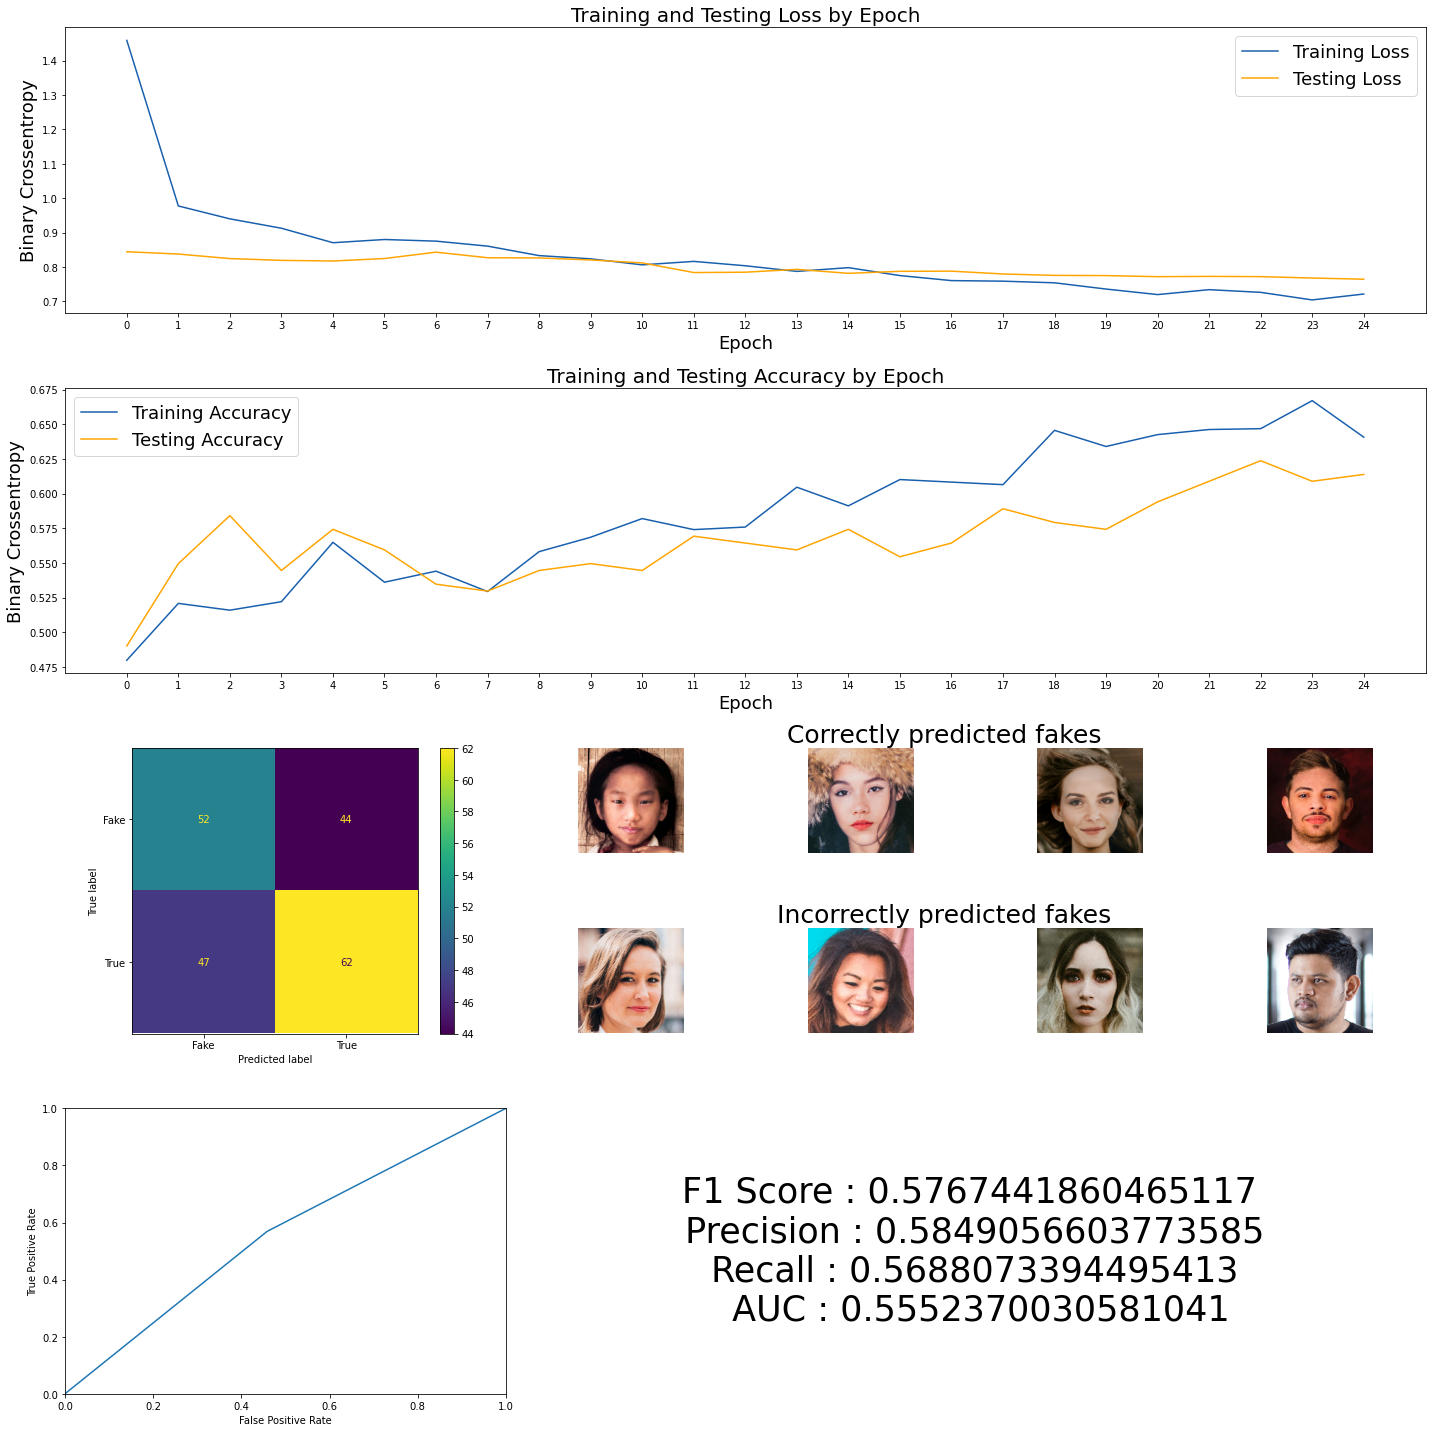

In [18]:
matches_4,mismatches_4, plot=Universal().plot_results_duo(history_custom,model_custom,X_test_150,y_test_150,"custom_model");

These are good results! 
Model finally is able to differentiate two classes and make correct predictions.


1/1 [==============================] - 0s 54ms/step


2022-11-11 23:29:03.171925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

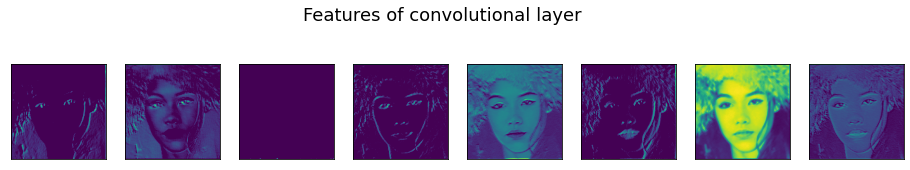

In [25]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],layer_num=0,savename="model_best_features_conv_0");

1/1 [==============================] - 0s 136ms/step


2022-11-11 23:27:41.553907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

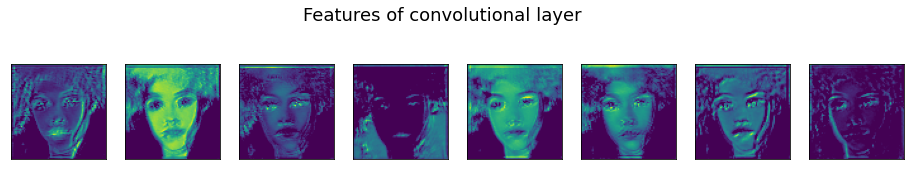

In [20]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],layer_num=3,savename="model_best_features_conv_3");

1/1 [==============================] - 0s 192ms/step


2022-11-11 23:27:54.408181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

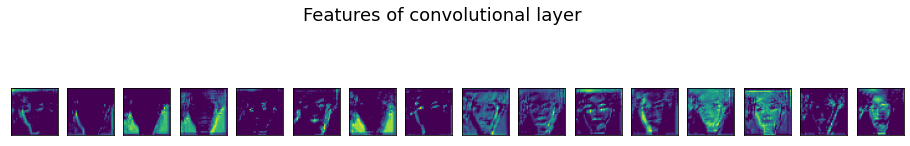

In [21]:
Universal().get_feat(model_custom,X_test_150[matches_4[1]],layer_num=6,savename="model_best_features_conv_6");

1/1 [==============================] - 0s 40ms/step


2022-11-11 23:28:49.365276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

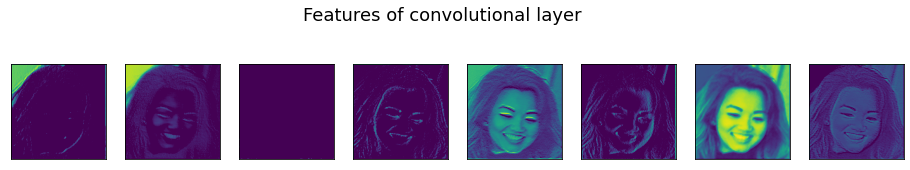

In [24]:
Universal().get_feat(model_custom,X_test_150[mismatches_4[1]],0,savename="model_best_features_conv_0_mismatch");

1/1 [==============================] - 0s 92ms/step


2022-11-11 23:29:13.743495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

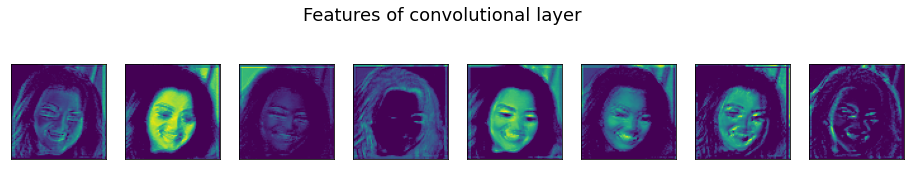

In [26]:
Universal().get_feat(model_custom,X_test_150[mismatches_4[1]],3,savename="model_best_features_conv_3_mismatch");

1/1 [==============================] - 0s 141ms/step


2022-11-11 23:29:24.631813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

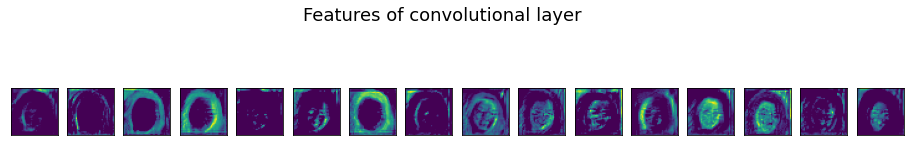

In [27]:
Universal().get_feat(model_custom,X_test_150[mismatches_4[1]],6,savename="model_best_features_conv_6_mismatch");

1/1 [==============================] - 0s 176ms/step


2022-11-11 23:29:37.985947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

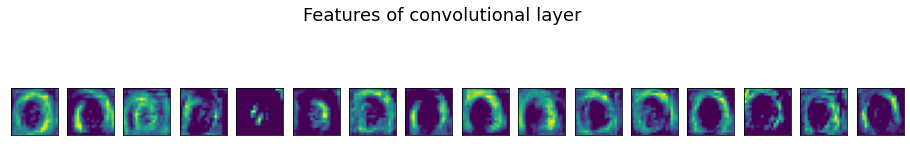

In [28]:
Universal().get_feat(model_custom,X_test_150[mismatches_4[1]],9,savename="model_best_features_conv_9_mismatch");

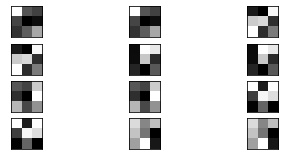

In [29]:
Universal().get_filters(model_custom,0,savename="best_model_filters")

[<keras.layers.convolutional.conv2d.Conv2D object at 0x2c4e67c10>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x3879ea730>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2c51baa60>, <keras.layers.convolutional.conv2d.Conv2D object at 0x359f15c70>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x359f3c9a0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2c4e67610>, <keras.layers.convolutional.conv2d.Conv2D object at 0x36338d7c0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x359f40580>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x35a327be0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x35a32ff70>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x35a346d30>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x35a319c70>, <keras.layers.reshaping.flatten.Flatten object at 0x35a38de50>, <keras.layers.r

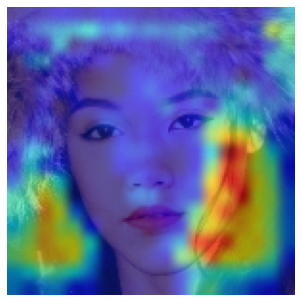

In [30]:
Universal().get_conv(model_custom,X_test_150[matches_4[1]],"model_custom_filters");

Finally, we have a robust result. Difference in scores between first three models and the last one shows, that change of input images positively affected model performance. In addition, to much less time needed to process. I will use this last model as a production one. It gave me the best results,it really "catches the signal" and differences classes.
As a next step, I'll try to improve it's performance with augmentation technics.

Cleaning

In [ ]:
# free-up memory
del model_custom
gc.collect()
tf.keras.backend.clear_session()